# Plotting a Surface

In [17]:
pip install ipympl

"""
After run this cell, restart JupyterLab. You do not need to run this cell again.
"""

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib widget
#%matplotlib notebook
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

"""

https://matplotlib.org/stable/

"""

from matplotlib import cm # cm stands for color map

### Surface

Consider the surface given by 
$$E(w_1, w_2) = w_1^4 + w_2^4 - 16 w_1 w_2.$$

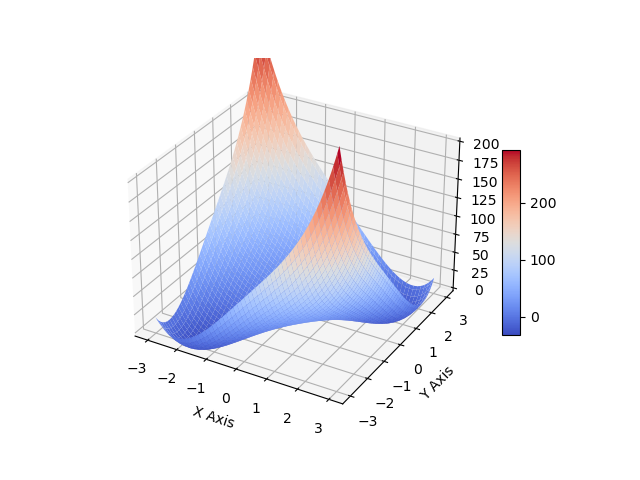

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

"""
plt.subplots() is a function that returns a tuple 
containing a figure and axes objects.
"""

x = y = np.linspace(-3,3,100)
X, Y = np.meshgrid(x, y)
Z = X**4+Y**4-16*X*Y

surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
#surf = ax.plot_surface(X,Y,Z, cmap=cm.PiYG)

ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.show()

### Another Surface

$$z=\frac{\sin(\sqrt{x^2+y^2+5})}{\sqrt{x^2+y^2+5}}$$


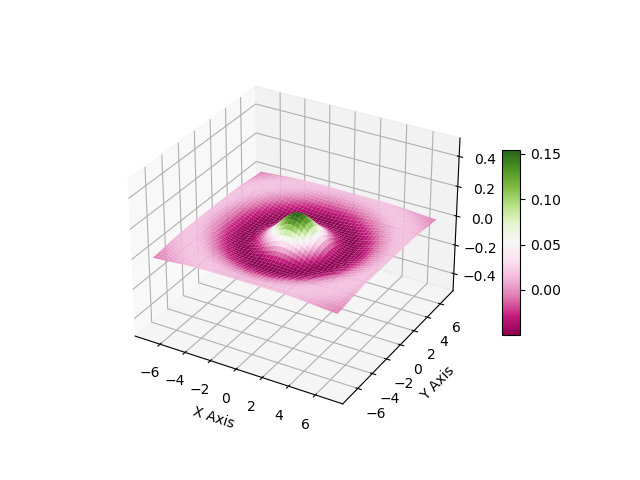

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

"""
plt.subplots() is a function that returns a tuple 
containing a figure and axes objects.
"""

x = y = np.linspace(-7,7,500)
X, Y = np.meshgrid(x, y)

Z=np.sin((X**2+Y**2+5)**(1/2))/(X**2+Y**2+5)

#surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
surf = ax.plot_surface(X,Y,Z, cmap=cm.PiYG)

ax.set_zlim(-0.5, 0.5)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.show()

## Gradient Descent

The gradient of $E$ is
$$ \nabla E = [ 4 w_1^3-16 w_2, 4 w_2^3 - 16 w_1] . $$

The formula for gradient descent is
$$ \mathbf w_{k+1} = \mathbf w_k - \eta \nabla E ( \mathbf w_k) . $$

In [20]:
def E(u,v):
    return u**4+v**4-16*u*v

eta=0.01
x=1.2; y=1.2
print (0,'\t','x=', x,'\t','y=',y,'\t', 'E=',E(x,y))

#'\t' is the escape sequence for tab.

0 	 x= 1.2 	 y= 1.2 	 E= -18.8928


In [21]:
for i in range(0,30):
    g=4*x**3-16*y
    h=4*y**3-16*x
    x=x-eta*g
    y=y-eta*h
    print (i+1,'\t','x=',round(x,3),'\t','y=',round(y,3),'\t','E=',round(E(x,y),3))
    

1 	 x= 1.323 	 y= 1.323 	 E= -21.875
2 	 x= 1.442 	 y= 1.442 	 E= -24.621
3 	 x= 1.553 	 y= 1.553 	 E= -26.95
4 	 x= 1.651 	 y= 1.651 	 E= -28.76
5 	 x= 1.735 	 y= 1.735 	 E= -30.048
6 	 x= 1.804 	 y= 1.804 	 E= -30.889
7 	 x= 1.858 	 y= 1.858 	 E= -31.399
8 	 x= 1.899 	 y= 1.899 	 E= -31.688
9 	 x= 1.929 	 y= 1.929 	 E= -31.843
10 	 x= 1.95 	 y= 1.95 	 E= -31.923
11 	 x= 1.966 	 y= 1.966 	 E= -31.963
12 	 x= 1.976 	 y= 1.976 	 E= -31.982
13 	 x= 1.984 	 y= 1.984 	 E= -31.992
14 	 x= 1.989 	 y= 1.989 	 E= -31.996
15 	 x= 1.992 	 y= 1.992 	 E= -31.998
16 	 x= 1.995 	 y= 1.995 	 E= -31.999
17 	 x= 1.996 	 y= 1.996 	 E= -32.0
18 	 x= 1.998 	 y= 1.998 	 E= -32.0
19 	 x= 1.998 	 y= 1.998 	 E= -32.0
20 	 x= 1.999 	 y= 1.999 	 E= -32.0
21 	 x= 1.999 	 y= 1.999 	 E= -32.0
22 	 x= 1.999 	 y= 1.999 	 E= -32.0
23 	 x= 2.0 	 y= 2.0 	 E= -32.0
24 	 x= 2.0 	 y= 2.0 	 E= -32.0
25 	 x= 2.0 	 y= 2.0 	 E= -32.0
26 	 x= 2.0 	 y= 2.0 	 E= -32.0
27 	 x= 2.0 	 y= 2.0 	 E= -32.0
28 	 x= 2.0 	 y= 2.0 	 E= -32

## Linear Regression Revisited

We will redo the example of multivariate-data in linear regression using gradient descent.

In [5]:
data = np.genfromtxt('multivar_simulated.csv',skip_header=1,delimiter=',')

In [6]:
data[:3,:]

array([[ 0.        ,  9.22345149,  1.62488669, -0.33204394],
       [ 1.        , -6.51121434,  0.25676938,  4.16345627],
       [ 2.        , -3.83393779,  1.78444569,  3.73164655]])

In [7]:
Y = data[:,1]
X1 = data[:,2:]

In [8]:
Y.shape, X1.shape

((75,), (75, 2))

In [9]:
O = np.ones(shape=(X1.shape[0],1))
X = np.concatenate([X1,O],axis=1)
X.shape

(75, 3)

The error function is given by
$$ E = \sum_{j=1}^{N} (y_j-\sum_{s=1}^{k+1} x_{js}m_{s})^2 .$$

Write a function for $E$.

In [65]:
#def Er(M):
#    formula here
#    return the result

The gradient of $E$ is given by
$$ \nabla E  = -2 X^{\intercal}Y + 2
X^{\intercal}XM. $$

Write a function for $\nabla E$.

In [67]:
#def GE(M):
#    return formula here

Choose initial values.

In [70]:
#eta=
#iter_num=
#M=np.array([?,?,?])    

Calculate the initial error.

In [13]:
Er(M)

6199.674559434617

Run a loop for gradient descent and print the values of M and Er(M).

In [1]:
#Write a loop here
#
#print M and Er(M)

Compare the result with the previous result from Linear Regression which was 

[ 1.78777492, -3.47899986,  6.0608333 ]



## Newton's Method

$$ E=w_1^4+ w_2^4 - 16 w_1 w_2$$

$$ \nabla E = [ 4 w_1^3-16 w_2, 4 w_2^3 - 16 w_1]  $$

$$\mathbf HE^{-1} \nabla E = \frac 1 {9w_1^2 w_2^2 -16} \begin{bmatrix} 3 w_1^3 w_2^2 - 8 w_2^3 -16w_1 \\ 3 w_1^2 w_2^3 -8 w_1^3  -16w_2  \end{bmatrix}$$

$$\boxed{ \mathbf w_{k+1}= \mathbf w_k - \eta \mathbf H E (\mathbf w_{k})^{-1} \nabla E(\mathbf w_k)}$$

In [23]:
def E(u,v):
    return u**4+v**4-16*u*v

eta=1
x=1.2; y=1.2
print (0,'\t','x=', x,'\t','y=',y, '\t','E=',E(x,y))
for i in range(0,10):
    d=9*x**2*y**2-16
    g=(3*x**3*y**2 -8*y**3 -16*x)/d
    h=(3*x**2*y**3 -8*x**3 -16*y)/d
    x=x-eta*g
    y=y-eta*h
    print (i+1,'\t','x=', round(x,3),'\t','y=',round(y,3), '\t','E=',round(E(x,y),3))


0 	 x= 1.2 	 y= 1.2 	 E= -18.8928
1 	 x= 10.8 	 y= 10.8 	 E= 25343.539
2 	 x= 7.283 	 y= 7.283 	 E= 4778.985
3 	 x= 4.981 	 y= 4.981 	 E= 833.891
4 	 x= 3.509 	 y= 3.509 	 E= 106.231
5 	 x= 2.623 	 y= 2.623 	 E= -15.382
6 	 x= 2.169 	 y= 2.169 	 E= -31.005
7 	 x= 2.018 	 y= 2.018 	 E= -31.99
8 	 x= 2.0 	 y= 2.0 	 E= -32.0
9 	 x= 2.0 	 y= 2.0 	 E= -32.0
10 	 x= 2.0 	 y= 2.0 	 E= -32.0


### Banknote Authentication Data Set

https://archive.ics.uci.edu/ml/datasets/banknote+authentication


In [200]:
import numpy as np
from sklearn.model_selection import train_test_split

In [247]:
data=np.genfromtxt('bank_note.csv',delimiter=',')

In [202]:
data[:10,:]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ,  0.     ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ,  0.     ],
       [ 4.3684 ,  9.6718 , -3.9606 , -3.1625 ,  0.     ],
       [ 3.5912 ,  3.0129 ,  0.72888,  0.56421,  0.     ],
       [ 2.0922 , -6.81   ,  8.4636 , -0.60216,  0.     ],
       [ 3.2032 ,  5.7588 , -0.75345, -0.61251,  0.     ],
       [ 1.5356 ,  9.1772 , -2.2718 , -0.73535,  0.     ]])

In [214]:
data.shape

(1372, 5)

In [248]:
t = data[:,-1]
X_raw = data[:,:4]

In [216]:
t.shape, X_raw.shape

((1372,), (1372, 4))

In [217]:
t, X_raw[:10,:]

(array([0., 0., 0., ..., 1., 1., 1.]),
 array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
        [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
        [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
        [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ],
        [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ],
        [ 4.3684 ,  9.6718 , -3.9606 , -3.1625 ],
        [ 3.5912 ,  3.0129 ,  0.72888,  0.56421],
        [ 2.0922 , -6.81   ,  8.4636 , -0.60216],
        [ 3.2032 ,  5.7588 , -0.75345, -0.61251],
        [ 1.5356 ,  9.1772 , -2.2718 , -0.73535]]))

In [249]:
O = np.ones(shape=(X_raw.shape[0],1))
X = np.concatenate([X_raw,O],axis=1)
X.shape

(1372, 5)

### Splitting the data

We split the data set into two parts: one for train and the other for test.

In [278]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(960, 5) (960,)
(412, 5) (412,)


In [279]:
X_train[:10,:]

array([[-3.0731  , -0.53181 ,  2.3877  ,  0.77627 ,  1.      ],
       [-0.36038 ,  4.1158  ,  3.1143  , -0.37199 ,  1.      ],
       [-2.121   , -0.05588 ,  1.949   ,  1.353   ,  1.      ],
       [ 0.75736 ,  3.0294  ,  2.9164  , -0.068117,  1.      ],
       [ 3.946   ,  6.8514  , -1.5443  , -0.5582  ,  1.      ],
       [-4.8392  ,  6.6755  , -0.24278 , -6.5775  ,  1.      ],
       [ 1.7496  , -0.1759  ,  5.1827  ,  1.2922  ,  1.      ],
       [-0.77288 , -7.4473  ,  6.492   ,  0.36119 ,  1.      ],
       [-1.7279  , -6.841   ,  8.9494  ,  0.68058 ,  1.      ],
       [ 1.4507  ,  8.7903  , -2.2324  , -0.65259 ,  1.      ]])

Define the function $\sigma(x) = \dfrac {e^x}{e^x+1}= \dfrac 1 {1+e^{-x}}$.

In [280]:
#def sigmoid(x):    
#    return the function

Define the error function
$$ E (\mathbf{w}) = - \frac 1 N \sum_{n=1}^N \{ t_n \ln y_n + (1-t_n) \ln (1-y_n)\},  $$
where $y_n=\sigma(w_1 x_{n1}+ w_2 x_{n2} + \cdots + w_k x_{nk}+w_{k+1} )$. 

This function will be obtained in Logistic Regression.

In [282]:
# Use X_train, t_train and n_train

#def Er(w):
#    yn=??
#    return ???

The gradient of $E$ is given by

$$\nabla E= \left [ \frac 1 N \sum_{n=1}^N (y_n-t_n)x_{nj} \right ] = \frac 1 N X^\top (\mathbf y - \mathbf t).$$


In [284]:
#def gradE(w):
#    yn=??
#    return the function

Set the initial values.

In [286]:
#w=np.array([?,?,?,?])
#eta=
#iter_num=

Run a loop for gradient descent.

In [515]:
#for i in range(iter_num):
#

In [517]:
print(w, Er(w))

[-1.81598184 -1.07970922 -1.21662768 -0.24290729  1.52006415] 0.04911329426007319


We compute the accuracy of the trained model.

In [518]:
t_pred=(sigmoid(X_test@w).round())
print("Train Accuracy:", sum(t_test==t_pred)*100/n_test,"%")

Train Accuracy: 98.7864077669903 %


## Newton's method

$$\boxed{ \mathbf w_{k+1}= \mathbf w_k - (X^\top R X)^{-1} X^\top (\mathbf y-\mathbf t) }, \qquad R=\mathrm{diag}(y_n(1-y_n))$$

(Note that $N$ has been canceled out.)

In [519]:
w=np.array([0,0,0,0,0])
iter_num=100

In [520]:
from numpy.linalg import inv

for i in range(iter_num):
    yn=sigmoid(X_train@w)
    R=np.diag(yn*(1-yn))
    w=w-inv(X_train.T@R@X_train)@(X_train.T@(yn-t_train))
    if i%10==0:
        print(w,Er(w))

[-0.56502813 -0.31694497 -0.41178812 -0.00621764  1.1735832 ] 0.19984958427504682
[-7.9904494  -4.15774899 -5.25448473 -0.4890516   7.06633709] 0.017770777831300832
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162095
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162078
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162092
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162102
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162078
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162102
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162102
[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162074


In [521]:
print(w, Er(w))

[-7.99186328 -4.1584867  -5.25543342 -0.48922172  7.06752184] 0.017770777552162078


In [522]:
t_pred=(sigmoid(X_test@w).round())
print("Train Accuracy:", sum(t_test==t_pred)*100/n_test,"%")

Train Accuracy: 99.02912621359224 %
